<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None
       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      475.000000   485.000000
mean   249.693069   52.918812      133.412632   200.470103
std    144.240508   21.064700       25.933424    58.533857
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      111.000000   149.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374

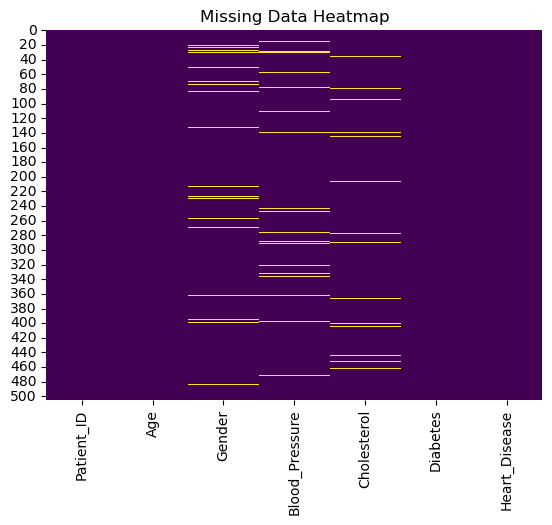

       Patient_ID         Age  Blood_Pressure  Cholesterol
count  505.000000  505.000000      505.000000   505.000000
mean   249.693069   52.918812      133.328713   200.728713
std    144.240508   21.064700       25.151976    57.374878
min      1.000000   18.000000       90.000000   101.000000
25%    126.000000   34.000000      113.000000   151.000000
50%    249.000000   52.000000      132.000000   207.000000
75%    374.000000   71.000000      153.000000   248.000000
max    500.000000   89.000000      179.000000   299.000000


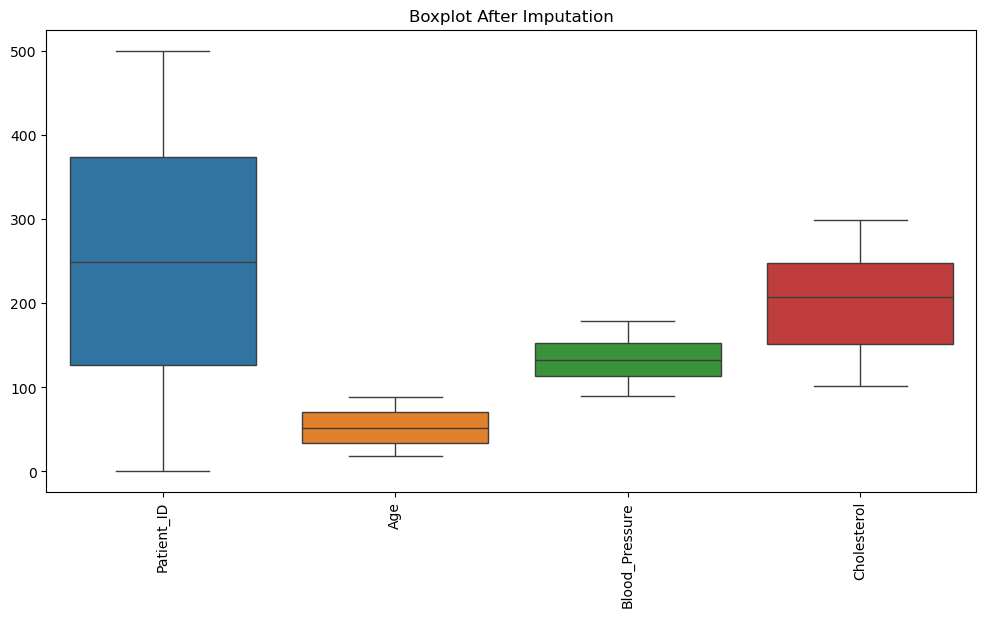

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings("ignore")

# Load dataset (replace 'healthcare_data.csv' with actual filename)
df = pd.read_csv('Day_15_Healthcare_Data.csv')

# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df.isna().sum())

# Percentage of missing values
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

# Visualization of missing data
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

# Handling missing values
# 1. Mean/Median/Mode Imputation
for col in df.select_dtypes(include=["number"]):
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=["object"]):
    df[col].fillna(df[col].mode()[0], inplace=True)

# 2. KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
df_knn = pd.DataFrame(knn_imputer.fit_transform(df.select_dtypes(include=["number"])),
                      columns=df.select_dtypes(include=["number"]).columns)

# 3. Regression Imputation
for col in df.select_dtypes(include=["number"]):
    if df[col].isna().sum() > 0:
        train_df = df.dropna(subset=[col])
        test_df = df[df[col].isna()]
        
        X_train = train_df.drop(columns=[col])
        y_train = train_df[col]
        X_test = test_df.drop(columns=[col])
        
        model = LinearRegression()
        model.fit(X_train, y_train)
        df.loc[df[col].isna(), col] = model.predict(X_test)

# Evaluate impact
print(df.describe())

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=["number"]))
plt.title("Boxplot After Imputation")
plt.xticks(rotation=90)
plt.show()

